# Experimentation

What kernels can potentially make a bell-shaped input data (1 = True, 0 = False) linearly separable?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import uniform

%matplotlib inline

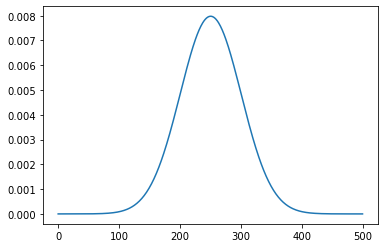

In [57]:
def pdf(x, mean, variance):
    return 1/(variance * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * variance**2))

data = []
for i in range(500):
    data.append(pdf(i,250.0,50))
    
data = np.array(data)
plt.plot(data)

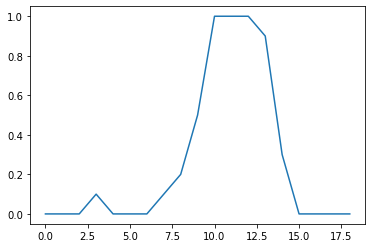

In [2]:
data = [
    0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.1, 0.2, 0.5, 1.0, 1.0, 1.0, 0.9, 0.3, 0.0, 0.0, 0.0, 0.0
]
data = np.array(data).astype(float)
plt.plot(data)

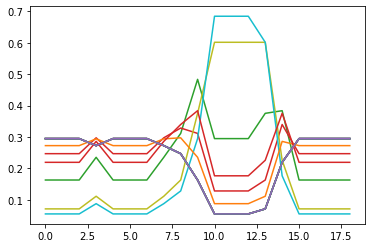

In [3]:
from sklearn.kernel_approximation import Nystroem

ny = Nystroem(kernel='rbf', n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

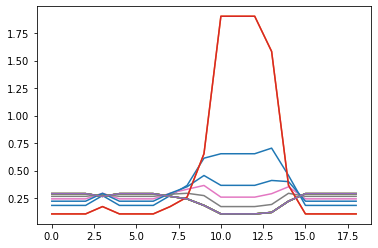

In [4]:
ny = Nystroem(kernel='poly', degree=3, n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

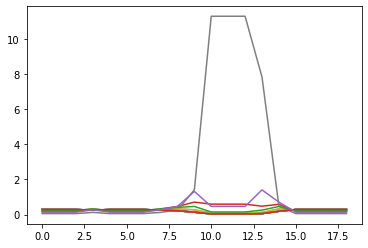

In [5]:
ny = Nystroem(kernel='poly', degree=7, n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

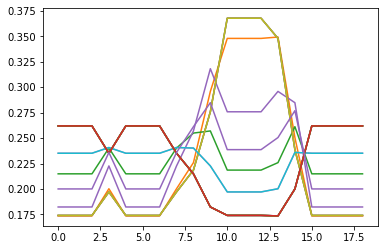

In [6]:
ny = Nystroem(kernel='sigmoid', n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

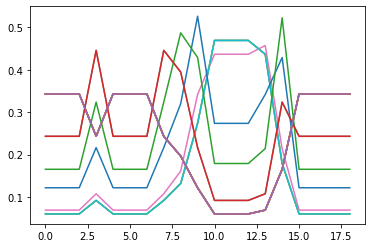

In [7]:
ny = Nystroem(kernel='chi2', n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

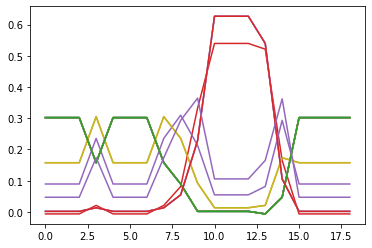

In [8]:
ny = Nystroem(kernel='additive_chi2', n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

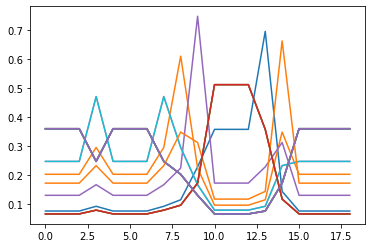

In [9]:
ny = Nystroem(kernel='laplacian', n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

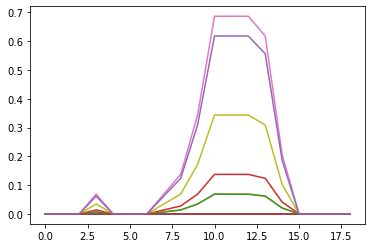

In [10]:
ny = Nystroem(kernel='linear', n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

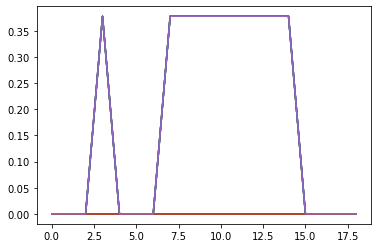

In [11]:
ny = Nystroem(kernel='cosine', n_components=15)
new_data = ny.fit_transform(data.reshape(-1, 1))

for i in range(new_data.shape[1]):
    plt.plot(new_data[:,i])
plt.show()

In [37]:
from pygam import LinearGAM, LogisticGAM, PoissonGAM, GammaGAM, InvGaussGAM, s, f

X = np.array(list(range(19)))
y = data.reshape(-1,1)

gam = LinearGAM(s(0)).fit(X,y)
print(gam.summary())

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      6.9896
Link Function:                     IdentityLink Log Likelihood:                                  -632.8309
Number of Samples:                           19 AIC:                                              1281.641
                                                AICc:                                            1295.9908
                                                GCV:                                                0.0229
                                                Scale:                                              0.0085
                                                Pseudo R-Squared:                                    0.964
Feature Function                  Lam

C:\Users\kcfon\AppData\Local\Temp/ipykernel_5356/481292993.py:7: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  print(gam.summary())


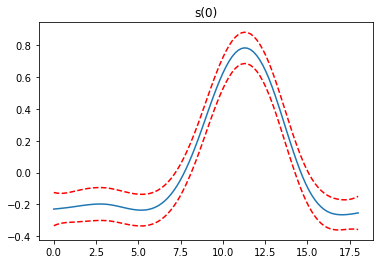

In [38]:
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue

    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

    plt.figure()
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(repr(term))
    plt.show()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Text(0.5, 1.0, 'draw samples from the posterior of the coefficients')

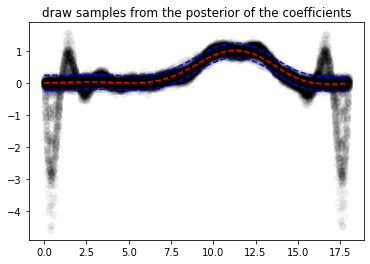

In [39]:
XX = gam.generate_X_grid(term=0, n=500)
for response in gam.sample(X, y, quantity='y', n_draws=50, sample_at_X=XX):
    plt.scatter(XX, response, alpha=.03, color='k')
plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')
plt.title('draw samples from the posterior of the coefficients')

In [42]:
XX = gam.generate_X_grid(term=0, n=500)
for sample in XX:
    print(gam.predict(sample))

[-0.0008327]
[-0.00046802]
[-9.88817967e-05]
[0.00027479]
[0.00065309]
[0.00103611]
[0.00142393]
[0.00181665]
[0.00221435]
[0.00261712]
[0.00302506]
[0.00343824]
[0.00385675]
[0.00428069]
[0.00471015]
[0.00514521]
[0.00558596]
[0.00603249]
[0.00648488]
[0.00694324]
[0.00740764]
[0.00787817]
[0.00835492]
[0.00883799]
[0.00932746]
[0.00982341]
[0.01032594]
[0.01083514]
[0.01135109]
[0.01187388]
[0.01240356]
[0.0129397]
[0.01348151]
[0.01402822]
[0.01457906]
[0.01513323]
[0.01568997]
[0.01624848]
[0.016808]
[0.01736775]
[0.01792693]
[0.01848479]
[0.01904052]
[0.01959337]
[0.02014254]
[0.02068726]
[0.02122675]
[0.02176022]
[0.02228691]
[0.02280602]
[0.02331679]
[0.02381843]
[0.02431017]
[0.02479121]
[0.02526079]
[0.02571813]
[0.02616244]
[0.02659294]
[0.02700886]
[0.02740942]
[0.02779383]
[0.02816127]
[0.02851093]
[0.028842]
[0.02915365]
[0.02944509]
[0.02971549]
[0.02996404]
[0.03018992]
[0.03039233]
[0.03057044]
[0.03072345]
[0.03085053]
[0.03095088]
[0.03102368]
[0.03106812]
[0.03108338

D:\kcfon\anaconda3\envs\efyp\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


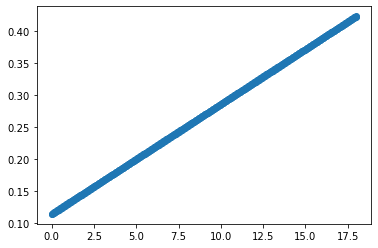

In [53]:
from sklearn.linear_model import TweedieRegressor

regr = TweedieRegressor(power=0, link='identity').fit(X.reshape(-1,1),y)

XX = gam.generate_X_grid(term=0, n=500)
preds = []
for sample in XX:
    temp = np.array(sample).reshape(1,-1)
    preds.append(regr.predict(temp))
    
preds = np.array(preds)

plt.scatter(XX, preds)